link tableau 
https://public.tableau.com/app/profile/gadist.diasmi/viz/P1M2_gadist_diasmi/Rata-rataHargaPerfume?publish=yes

https://public.tableau.com/app/profile/gadist.diasmi/viz/P1M2_gadist_diasmi_1/MerkYangPalingDominanDariKeduaKategori?publish=yes

# i. Pengenalan

Milestone 2

Nama  : Gadist Diasmi
Batch : CODA-RMT-005

Program ini dibuat untuk menganalisa data menggunakan statistik dan dashboard visualisasi untuk membantu penyelesaian masalah.

# ii. Identifikasi Masalah

## 1. Konteks Bisnis

Parfum lokal di Indonesia dengan aroma dan citra yang khas semakin diminati di pasar domestik. Namun, persaingan dengan parfum niche dari luar negeri tetap menjadi tantangan bagi industri dalam negeri. Hal ini mendorong brand lokal untuk menciptakan aroma yang lebih menarik dan kompetitif, sekaligus mempeluas jangkauan ke pasar internasional. Seperti, brand dari Alchemist telah menjadi salah satu produk incaran turis Malaysia saat berkunjung ke Indonesia, ini membuktikan potensi parfum lokal untuk bersaing di kancah global.

## 2. Key SMART & Problem Statement

Specific: Meningkatkan daya saing parfum lokal di pasar global dengan melihat preferensi tren penjualan dan segmentasi pelanggan, menciptakan harga yang bersaing dari parameter harga yang nanti akan dianalisis

Measurable: Meningkatkan penjualan parfum lokal sebesar 20% dalam 12 bulan, memperluas distirbusi ke 3 negara dalam 2 tahun, dan meluncurkan minimal 2 varian parfum baru berbasis tren pasar dalam 1 tahun

Achievable: Melakukan analisa data dengan melihat brand apa yang paling diminati baik dari segmen parfum untuk wanita dan pria, melakukan perbandingan harga dan melihat tren di kota mana yang paling banyak memiliki minat pada perfume

Relevan: Memanfaatkan tren wisatawan asing yang tertarik dengan parfum lokal sebagai strategi ekspansi pasar dan mendukung pertumbuhan industri kreatif Indonesia dan daya saing global.

Time Bound: Analisa ini akan digunakan pada quarter ke-2 

Problem Statement: Meningkatkan daya saing parfum lokal di pasar global dengan menganalisis tren penjualan, segmentasi pelanggan, dan parameter harga untuk menetapkan strategi kompetitif, menargetkan peningkatan penjualan 20% dalam 12 bulan, ekspansi ke tiga negara dalam dua tahun, serta peluncuran dua varian baru dalam satu tahun, sejalan dengan tren wisatawan asing sebagai peluang ekspansi, dengan implementasi analisis pada kuartal kedua.

## 3. 5W+H1

1. Merk apa yang paling dominan baik kategori parfum untuk wanita maupun pria?
2. Tipe parfum apa yang paling disukai oleh wanita dan pria?
3. Berapa rata-rata harga parfum pada kedua kategori?
4. Kota mana yang paling banyak melakukan pembelian parfum?
5. Parfum yang memiliki stok terbanyak dan berasal dari kota mana?
6. Trend menggunakan last update, Bagaimana tren penjualan parfum dari waktu ke waktu?

# iii. Data Loading

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [29]:
dfw = pd.read_csv("ebay_womens_perfume.csv", index_col=0)
dfm = pd.read_csv("ebay_mens_perfume.csv", index_col=0)

In [30]:
# membuat kolom baru yaitu gender
dfw["gender"] = "Women"
dfm["gender"] = "Men"

In [ ]:
# menggabungkan data
df = pd.concat([dfw, dfm], ignore_index=True)
df.to_csv("ebay_perfume_save.csv", index=False)

# iii. Data Cleaning

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              2000 non-null   object 
 1   type               1995 non-null   object 
 2   price              2000 non-null   float64
 3   priceWithCurrency  2000 non-null   object 
 4   available          1758 non-null   float64
 5   availableText      1989 non-null   object 
 6   sold               1978 non-null   float64
 7   lastUpdated        1874 non-null   object 
 8   itemLocation       2000 non-null   object 
 9   gender             2000 non-null   object 
dtypes: float64(3), object(7)
memory usage: 156.4+ KB


In [223]:
# menghapus kolom yang tidak akan terpakai
df.drop(columns=['priceWithCurrency', 'availableText'], inplace=True)

In [224]:
# meubah beberapa nama kolom
df.rename(columns={'lastUpdated': 'last update', 'itemLocation': 'item location'}, inplace=True)

In [227]:
# meubah data last update
df['last update'] = df['last update'].dt.strftime('%Y-%m-%d %H:%M')
print(df['last update'].unique())


['2024-05-23 10:43' '2024-05-24 00:15' '2024-05-14 20:54' ...
 '2024-05-22 12:42' '2024-05-23 15:27' '2024-05-20 13:20']


In [226]:
# meubah last update menjadi tipe data datetime
df['last update'] = pd.to_datetime(df['last update'], errors='coerce')


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14204\858871084.py:2: FutureWarning: Parsed string "May 23, 2024 10:43:50 PDT" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['last update'] = pd.to_datetime(df['last update'], errors='coerce')


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          2000 non-null   object 
 1   type           1995 non-null   object 
 2   price          2000 non-null   float64
 3   available      1758 non-null   float64
 4   sold           1978 non-null   float64
 5   last update    1723 non-null   object 
 6   item location  2000 non-null   object 
 7   gender         2000 non-null   object 
dtypes: float64(3), object(5)
memory usage: 125.1+ KB


1. kolom yang memiliki data missing value beripe object: type
2. sedangkan kolom yang memiliki data missing value bertipe float: available dan sold
3. dan kolom datetime yaitu last update

In [229]:
# imputasi dengan Default
df.fillna({'type':'Unknown'}, inplace=True)

In [230]:
# imputasi nilai float yang terdapat missi value dengan hasil 0.0
nilai_float = ['available', 'sold']
df[nilai_float] = df[nilai_float].fillna(0.0)

In [231]:
# lalu meubah tipe data available dan sold menjadi integer 
df['available'] = df['available'].astype(int)
df['sold'] = df['sold'].astype(int)

In [232]:
# imputasi last update menggunakan modus tahun
df['last update'].fillna(df['last update'].mode()[0], inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14204\2923673484.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['last update'].fillna(df['last update'].mode()[0], inplace=True)


In [233]:
# menghitung persentase missing value dari masing2 column
missing_count = df.isnull().sum()
percent_missing = missing_count/len(df)
missing_value_df = pd.DataFrame({'count_missing': missing_count, 'percent_missing': percent_missing})
missing_value_df

,count_missing,percent_missing
title,0,0.0
type,0,0.0
price,0,0.0
available,0,0.0
sold,0,0.0
last update,0,0.0
item location,0,0.0
gender,0,0.0


In [235]:
# split item location menjadi 3 kolom yg terdiri dari city, region and country
df[['city', 'region', 'country']] = df['item location'].str.split(',', n=2, expand=True)

In [236]:
# setelah diperhatikan data yang sesaui hanya kolom region, maka ghapus kolom yang tidak akan terpakai
df.drop(columns=['item location', 'city', 'country'], inplace=True)

In [237]:
# pada data region sebenarnya masih berantakan misal ada USA, sehinga perlu dirapikan agar lebih sesuai

from geopy.geocoders import Nominatim

geocolator = Nominatim(user_agent="geoapi", timeout=10)
# fungsi untuk mengambil ibu kota
def ger_capital(region):
    location = geolocator.geocode(region)
    if location: 
        return location.address.split(',')[0]
    return region # jika nilai asli tidak ditemukan maka kembalikan ke awal

df['region'] = df['region'].apply(get_capital)

In [5]:
# meubah beberapa nama region 
df['region'] = df['region'].replace({'香港 Hong Kong':'Hong Kong', 'City of New York':'New York', 
                                    'New Jersey':'Trenton', '中国':'Beijing', 'United States':'Washington'})

In [6]:
df.rename(columns={'region':'location'}, inplace=True)

In [9]:
# mengecek semua data yg ada di dalam type
pd.options.display.max_rows = None
print(df['type'].value_counts())

type
Eau De Perfume     1085
Eau De Toilette     660
Eau De Cologne      111
Body Mist            91
Other                53
Name: count, dtype: int64


In [7]:
# karena kategori parfumnya begitu banyak, maka saya ingin mengelompokkannya menjadi satu

def kategori_perfume(x):
    x = x.lower().strip()
    if any(keyword in x for keyword in['eau de parfum', 'extrait de parfum', 'perfume', 'PARFUM', 'parfum', 'esprit de parfum', 'le parfum', 'parfum intense', 'esprit de parfum', 'elixir de parfum']):
        return 'Eau De Perfume'
    elif any(keyword in x for keyword in ['eau de toilette', 'toilette', 'EDT', 'edt']):
        return 'Eau De Toilette'
    elif any(keyword in x for keyword in ['eau de cologne', 'cologne']):
        return 'Eau De Cologne'
    elif any(keyword in x for keyword in ['body spray', 'spray', 'fragrance', 'fragrance mist', 'fragrances', 'Perfume Oil','body oil', 'oil', 'gift sets' ]):
        return 'Body Mist'
    else:
        return 'Other' # jika tidak sesuai dari kategori di atas

df['type'] = df['type'].apply(kategori_perfume)

In [25]:
dfs['last update'] = pd.to_datetime(dfs['last update'], errors='coerce')

In [28]:
dfs.to_csv("ebay_perfume.csv", index=False)

In [29]:
dfs = pd.read_csv("ebay_perfume.csv")

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        2000 non-null   object 
 1   type         2000 non-null   object 
 2   price        2000 non-null   float64
 3   available    2000 non-null   int64  
 4   sold         2000 non-null   int64  
 5   last update  2000 non-null   object 
 6   gender       2000 non-null   object 
 7   location     2000 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 125.1+ KB


# vi. Analsis dan Perhitungan

### Ukuran Terpusat 

#### i. Price

In [148]:
print('Rata-rata price:',df['price'].mean())
print('Median price:',df['price'].median())
print('Mode price:',df['price'].mode().values[0])

Rata-rata price: 43.18709
Median price: 34.04
Mode price: 49.99


In [154]:
std = df['price']. std()
print('Standard Deviation dari Price',std)

Standard Deviation dari Price 32.619625350560135


In [156]:
print(f"Skewness: {df['price'].skew()}")

Skewness: 2.503409083998559


In [157]:
print(f"kurtosis: {df['price'].kurtosis()}")

kurtosis: 10.36786203666211


<Axes: >

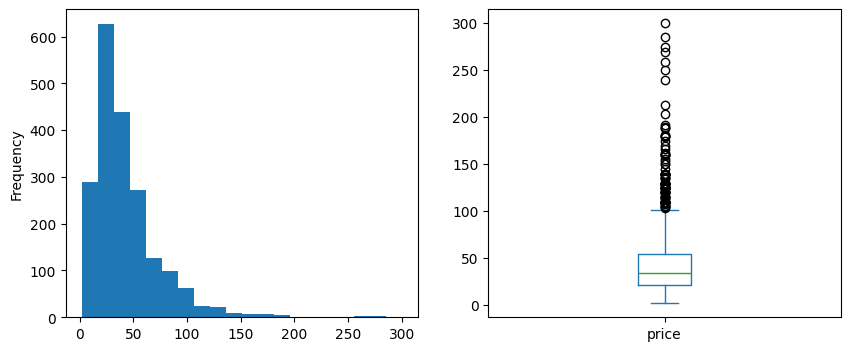

In [158]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))

df['price'].plot(kind='hist',bins=20,ax=ax[0])
df['price'].plot(kind='box',ax=ax[1])

Dari hasil analisis terhadap harga produk ditemukan bahwa rata-rata berkisar USD 43.18, mediannya USD 34.04 dan brand cenderung menjual dengan harga USD 49.99
Standar deviasi sebesar 32.62 menunjukkan bahwa variasi harga cukup vesar. Dengan skewness positif menandakan bahwa cukup banyak produk dijual dengan harga lebih rendah dari rata-rata, tetapi ada beberapa produk berharga tinggi yang mendorong rata-rata naik. Dan kurtosis tinggi, menunjukkan bahwa distribusi harga memiliki puncak yang lebih tajam menandakan adanya beberapa harga ekstrem seperti USD 100.00

#### ii. Produk Terjual

In [161]:
print('Mean of sold items',df['sold'].mean())
print('Median of sold items',df['sold'].median())
print('Mode of sold items',df['sold'].mode().values[0])

Mean of sold items 625.5165
Median of sold items 49.0
Mode of sold items 4


In [162]:
std = df['sold'].std()
print('Standard Deviation of Items Sold:',std)

Standard Deviation of Items Sold: 2457.312206938495


In [163]:
print(f"Skewness: {df['sold'].skew()}")


Skewness: 11.365209734625655


In [164]:
print(f"Kurtosis: {df['sold'].kurtosis()}")

Kurtosis: 181.44629257928912


<Axes: >

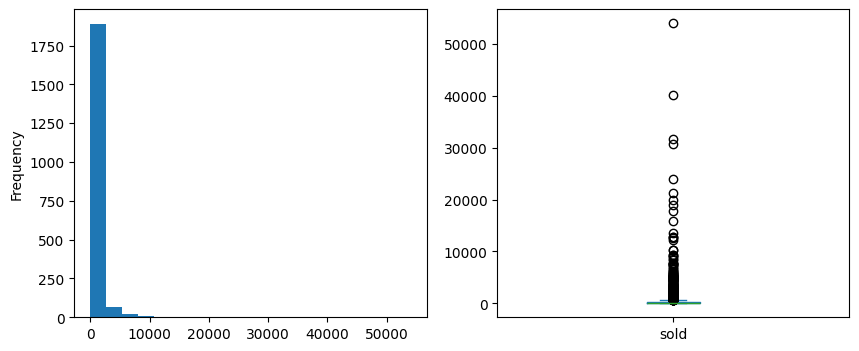

In [172]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))

df['sold'].plot(kind='hist',bins=20,ax=ax[0])
df['sold'].plot(kind='box',ax=ax[1])

Rata-rata jumlah barang yang terjual adalah 625.52, tetapi nilai median jauh lebih rendah di 49, dan mode hanya 4 yang menunjukkan bahwa sebagian besar produk terjual dalam jumlah kecil. Standar deviasi yang sangat tinggi menandakan variasi penjualan yang besar. Skewness positif yang ekstrem menunjukkan bahwa sebagian besar produk memiliki penjualan produk rendah, tetapi ada produk dengan angka penjualan sangat tinggi yang menarik rata-rata ke atas. Kurtosis yang sangat tinggi mengindikasikan distribusi yang sangat runcing dengan banyak nilai ekstrem, di mana hanya sedikit produk yang terjual dalam jumlah sangat besar.

#### iii. Produk Tersedia

In [ ]:
print('Mean of Available items',df['available'].mean())
print('Median of Available items',df['available'].median())
print('Mode of Available items',df['available'].mode().values[0])

Mean of available items 18.2205
Median of available items 9.0
Mode of available items 10


In [174]:
std = df['available'].std()
print('Standard Deviation of Items Available:',std)

Standard Deviation of Items Available: 53.66129561493588


In [175]:
print(f"Skewness: {df['available'].skew()}")

Skewness: 7.723582423285827


In [176]:
print(f"Kurtosis: {df['available'].kurtosis()}")

Kurtosis: 78.34680975011997


<Axes: >

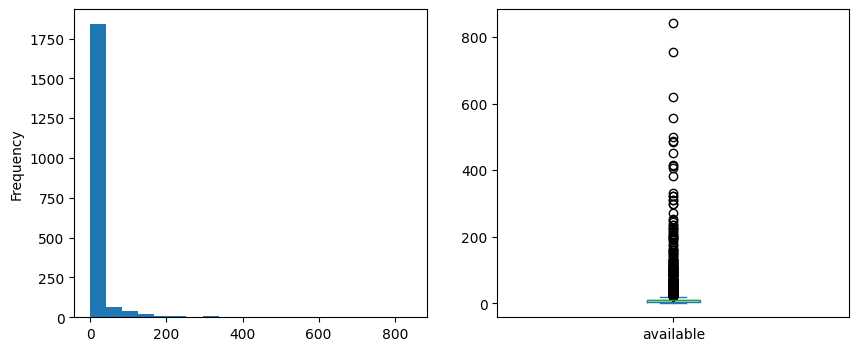

In [177]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))

df['available'].plot(kind='hist',bins=20,ax=ax[0])
df['available'].plot(kind='box',ax=ax[1])

Rata-rata jumlah stok yang tersedia adalh 18.22, tetapi median hanya 9 dan mode 10 yang menunjukkan bahwa sebagian besar produk memiliki stok yang relatif rendah. Standar deviasi yang tinggi menandakan adanya variasi stok yang besar antar produk. Skewness positif yg tinggi menunjukkan bahwa sebagian besar produk memiliki stok rendah, tetapi ada beberapa produk dengan stok sangat besar yang menarik rata-rata ke atas. Kurtosis yang sangat tinggi mengindikasinya distribusi yang sangat runcing, di mana sebagian besar produk memiliki stok kecil, sementara hanya sedikit yang memiliki stok dalam jumlah besar

### Statistik Deskriptif

korelasi antara harga dengan barang yg terjual, sebelum korelasi uji normalitas dari masing-masing variabel, bisa divisualisasikan dengan scatter plot.

In [185]:
# melihat korelasi antara harga dengan barang yang terjual 


df = df[(df['sold']>0) & (df['price']>0)]
df.head()

,id,title,type,price,available,sold,last update,gender,region
0,1,Good Girl by Carolina Herrera 2.7 oz Eau De Pa...,Eau de Parfum,43.99,2,393,2024-05-23 10:43:00,Women,Alabama
1,2,Parfums de Marly Delina La Rosee Eau de Parfum...,Eau de Parfum,79.99,5,40,2024-05-24 00:15:00,Women,香港 Hong Kong
2,3,PRADA Paradoxe by Prada EDP 3.0oz/90ml Spray P...,Eau de Parfum,59.99,10,35,2024-05-14 20:54:00,Women,New Jersey
3,4,J'adore Parfum D'eau by Christian 3.4 oz EDP F...,Eau de Parfum,59.99,10,9,2024-05-23 01:23:00,Women,New Jersey
5,6,Flowerbomb by Viktor & Rolf 3.4 oz 100ML Eau D...,Eau de Parfum,51.99,8,184,2024-05-23 10:44:00,Women,Michigan


In [189]:
revenue = df['sold'] * df['price']
revenue.head()


0    17288.07
1     3199.60
2     2099.65
3      539.91
5     9566.16
dtype: float64

In [191]:

print('Average =',revenue.mean())
print('Minimum =',revenue.min())
print('Maximum =',revenue.max())

Average = 20069.413078867543
Minimum = 12.0
Maximum = 1420246.15


In [195]:
std = revenue.std()
N = len(revenue)
low, up = stats.norm.interval(0.95,loc=revenue.mean(),scale=std/np.sqrt(N))
print('Lower Limit:',low)
print('Upper Limit:',up)

Lower Limit: 16663.906679169446
Upper Limit: 23474.91947856564


<function matplotlib.pyplot.show(close=None, block=None)>

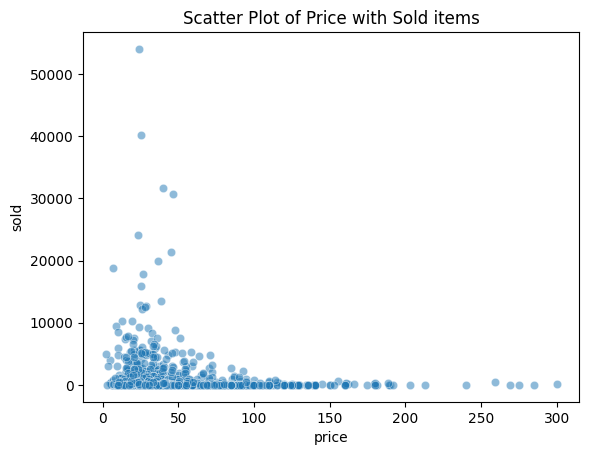

In [198]:
sns.scatterplot(data=df, x='price', y='sold', alpha=0.5)
plt.title('Scatter Plot of Price with Sold items')
plt.show

### Statistik Inferential

 untuk inferensial mengenai tipe parfum (ANOVA), visualisasi bisa pakai bar chart ambil filter perbanigan dara-rata harga antar tipe parfum.

In [32]:
pd.options.display.max_rows = None
print(dfs['type'].value_counts())

type
Eau De Perfume     1085
Eau De Toilette     660
Eau De Cologne      111
Body Mist            91
Other                53
Name: count, dtype: int64


In [33]:
EDP = dfs['price'][dfs['type']=='Eau De Perfume']
EDT = dfs['price'][dfs['type']=='Eau De Toilette']
EDC = dfs['price'][dfs['type']=='Eau De Cologne']
BM = dfs['price'][dfs['type']=='Body Mist']
OTH = dfs['price'][dfs['type']=='Other']


In [34]:
print(f'Average Price of EDP: {EDP.mean():.2f}')
print(f'Average Price of EDT: {EDT.mean():.2f}')
print(f'Average Price of EDC: {EDC.mean():.2f}')
print(f'Average Price of BM: {BM.mean():.2f}')
print(f'Average Price of OTH: {OTH.mean():.2f}')

Average Price of EDP: 47.48
Average Price of EDT: 38.17
Average Price of EDC: 40.63
Average Price of BM: 37.10
Average Price of OTH: 33.53


H0: tidak terdapat perbedaan signifikan antara harga dengan tipe parfum
H1: ada perbedaan signifikan antara harga dengan tipe parfum

In [35]:
res = stats.f_oneway(EDP, EDT, EDC, BM, OTH)
print('P-value:',res.pvalue)

P-value: 8.722888369736812e-09


p-value lebih dari 0.05, sehingga H0 ditolak yang menunjukkan ada perbedan signifikan antara harga dengan tipe parfum

In [ ]:
# membuat df_avg untuk didefinisikan sebelum digunakan pada barchart
df_avg = pd.DataFrame({
    'type': ['Eau De Perfume', 'Eau De Toilette', 'Eau De Cologne', 'Body Mist', 'Other'],
    'average price': [EDP.mean(), EDT.mean(), EDC.mean(), BM.mean(), OTH.mean()]
})


C:\Users\ASUS\AppData\Local\Temp\ipykernel_12124\2854758088.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='type', y='average price', data=df_avg, palette='viridis')


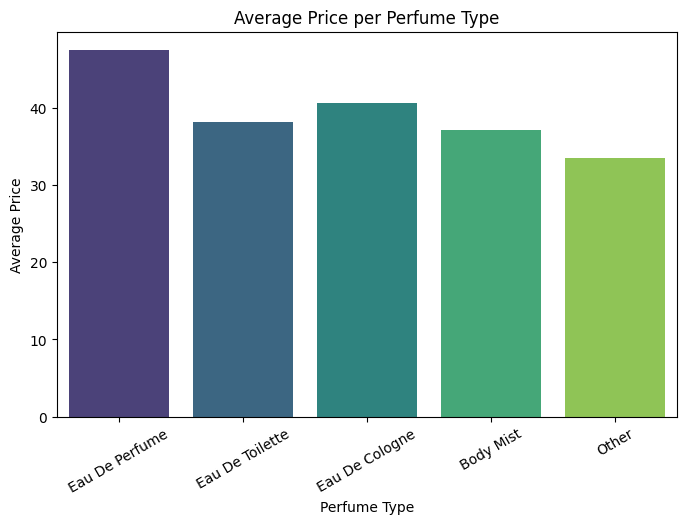

In [38]:
plt.figure(figsize=(8,5))
sns.barplot(x='type', y='average price', data=df_avg, palette='viridis')

plt.title('Average Price per Perfume Type')
plt.xlabel('Perfume Type')
plt.ylabel('Average Price')
plt.xticks(rotation=30)

plt.show()

# vi. Pengambilan Kesimpulan

Dari hasil analisis yang telah dijalankan dapat disimpulkan,
kita perlu mengeluarkan produk premium dpada jenis Eau De Perfume karena memiliki daya minat yang tinggi serta memiliki harga tertinggi. Sedangkan Eau De Cologne, Eau De toilette serta Body Mist dapat dijadikan produk sampingan agar pelanggan tetap memiliki lebih banyak pilihan. Lalu ekspansi ke pasar global harus mempertimbangkan perbedaan harga antar kategori parfum, serta tren wisatawan asing yang tertarik dengan parfum lokal.